<a href="https://colab.research.google.com/github/namratagulati/tweets_analysis/blob/main/tweets1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_csv (r'/content/drive/My Drive/tweets.csv')

# adding a row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 5 rows
print (df.head(5))

     id        hashtag_generation_time              searched_hashtag  \
0  7549  2022-08-26 13:56:37.490901+00  CBI Unfold D Truth InSSRCase   
1  6327  2022-08-26 13:54:52.480426+00  CBI Unfold D Truth InSSRCase   
2  6328  2022-08-26 13:54:52.618819+00  CBI Unfold D Truth InSSRCase   
3  6329  2022-08-26 13:54:52.656809+00  CBI Unfold D Truth InSSRCase   
4  6330  2022-08-26 13:54:52.696796+00  CBI Unfold D Truth InSSRCase   

       tweet_id        tweet_created_at     screen_name              name  \
0  1.563160e+18  2022-08-26 13:36:08+00        ATUL7735              ATUL   
1  1.563160e+18  2022-08-26 13:54:50+00    BabyPink1803              Alli   
2  1.563160e+18  2022-08-26 13:54:49+00      Tanutoor85  🍁𝓚𝓞𝓚𝓞(TanuToor)🍁   
3  1.563160e+18  2022-08-26 13:54:49+00  its_ssrwarrior     S U P R I Y A   
4  1.563160e+18  2022-08-26 13:54:48+00      Tanutoor85  🍁𝓚𝓞𝓚𝓞(TanuToor)🍁   

                                    user_description  followers_count  \
0                              

In [ ]:
#data preprocessing and manipulation
#create a new data frame with "row_id" that was added in the previous steps and "tweet" fields
df1 = df[['row_id', 'tweet']].copy()
#data clean-up
#remove all non-aphabet characters(keeping only uppercase,lowercase and #)
df1['tweet'] = df1['tweet'].str.replace("[^a-zA-Z#]", " ")
#change to lowercase for correct processing
df1['tweet'] = df1['tweet'].str.casefold()
print (df1.head(5))

   row_id                                              tweet
0       1  rt  privin     divine  ssr  atul     thanks a ...
1       2  rt  keesain    cbi unfold d truth inssrcase   ...
2       3  rt  chintujainhs   satyassrian   pmoindia  dop...
3       4  rt  sushfanseg  why rhea chakraborty s custodi...
4       5  rt  manisha        satyassrian   pmoindia  dop...


<ipython-input-8-6036285feb34>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['tweet'] = df1['tweet'].str.replace("[^a-zA-Z#]", " ")


In [ ]:
# create empty dataframe for staging output
df2=pd.DataFrame()
#initializing new df
df2['row_id']=['99999999999']
df2['sentiment_type']='NA999NA'
df2['sentiment_score']=0
df2

,row_id,sentiment_type,sentiment_score
0,99999999999,NA999NA,0


In [ ]:
print('Sentiment Analysis Stage')
# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
# Create an empty DataFrame to store results
dfnew = df2.copy()
# Iterate through each row in df1
for index, row in df1.iterrows():
    # Get sentiment scores using the SentimentIntensityAnalyzer
    scores = sia.polarity_scores(row[1])  # row[1] contains the tweet text
    for key, value in scores.items():
        # Add sentiment analysis results to dfnew
        dfnew = dfnew.append({'row_id': row[0], 'sentiment_type': key, 'sentiment_score': value}, ignore_index=True)
# Remove the initial row with row_id = 99999999999
dfnew = dfnew[dfnew.row_id != '99999999999']
# Remove duplicates
df3 = dfnew.drop_duplicates()
# Only keep rows where sentiment_type = compound
df3 = df3[df3.sentiment_type == 'compound']
# Print the cleaned DataFrame
print(df3.head(5))

Sentiment Analysis Stage


Streaming output truncated to the last 5000 lines.
<ipython-input-10-878a5445a716>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfnew = dfnew.append({'row_id': row[0], 'sentiment_type': key, 'sentiment_score': value}, ignore_index=True)
<ipython-input-10-878a5445a716>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfnew = dfnew.append({'row_id': row[0], 'sentiment_type': key, 'sentiment_score': value}, ignore_index=True)
<ipython-input-10-878a5445a716>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfnew = dfnew.append({'row_id': row[0], 'sentiment_type': key, 'sentiment_score': value}, ignore_index=True)
<ipython-input-10-878a5445a716>:12: FutureWarning: The frame.append method is deprecated and will be removed 

   row_id sentiment_type  sentiment_score
4       1       compound           0.9531
8       2       compound           0.7906
12      3       compound           0.3182
16      4       compound           0.3182
20      5       compound           0.3182


In [ ]:
#merge dataframes using inner join to keep similar rows
dfres = pd.merge(df, df3, on='row_id', how='inner')
print(dfres.head(5))

     id        hashtag_generation_time              searched_hashtag  \
0  7549  2022-08-26 13:56:37.490901+00  CBI Unfold D Truth InSSRCase   
1  6327  2022-08-26 13:54:52.480426+00  CBI Unfold D Truth InSSRCase   
2  6328  2022-08-26 13:54:52.618819+00  CBI Unfold D Truth InSSRCase   
3  6329  2022-08-26 13:54:52.656809+00  CBI Unfold D Truth InSSRCase   
4  6330  2022-08-26 13:54:52.696796+00  CBI Unfold D Truth InSSRCase   

       tweet_id        tweet_created_at     screen_name              name  \
0  1.563160e+18  2022-08-26 13:36:08+00        ATUL7735              ATUL   
1  1.563160e+18  2022-08-26 13:54:50+00    BabyPink1803              Alli   
2  1.563160e+18  2022-08-26 13:54:49+00      Tanutoor85  🍁𝓚𝓞𝓚𝓞(TanuToor)🍁   
3  1.563160e+18  2022-08-26 13:54:49+00  its_ssrwarrior     S U P R I Y A   
4  1.563160e+18  2022-08-26 13:54:48+00      Tanutoor85  🍁𝓚𝓞𝓚𝓞(TanuToor)🍁   

                                    user_description  followers_count  \
0                              

In [ ]:
dfres[["sentiment_score"]].describe()  #descriptive stats

,sentiment_score
count,5232.000000
mean,0.062906
std,0.492259
min,-0.966800
25%,-0.346800
50%,0.077200
75%,0.381800
max,0.975000


<Axes: title={'center': 'Sentiment Score'}, xlabel='tweet_created_at', ylabel='Mean Sentiment Score'>

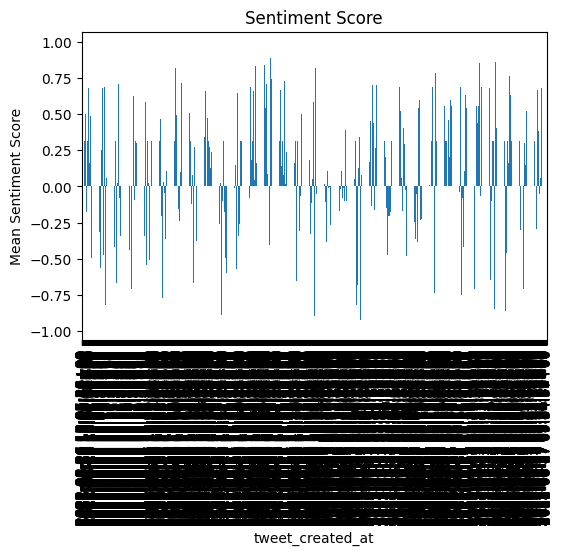

In [ ]:
#generate mean of sentiment_score by period, distribution of sentiment scores wrt time
dfnewres = dfres.groupby(['tweet_created_at'])['sentiment_score'].mean()
#create a bar plot
dfnewres.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='tweet_created_at', figsize=(6, 4))

<Axes: title={'center': 'sentiment_score'}, xlabel='retweet_count', ylabel='Mean Sentiment Score'>

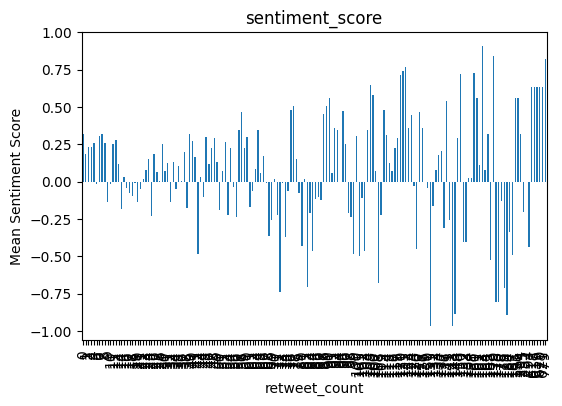

In [ ]:
dfnewres = dfres.groupby(['retweet_count'])['sentiment_score'].mean()  #mean sentiment score for each grp
dfnewres.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='retweet_count', figsize=(6, 4))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169]),
 [Text(0, 0, '0'),
  Text(1, 0, '1')

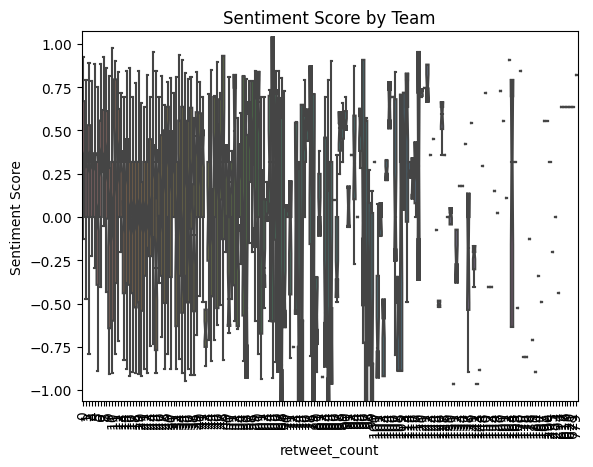

In [ ]:
import seaborn as sns
#create seaborn boxplots by group
sns.boxplot(x='retweet_count', y='sentiment_score', notch = True,
            data=dfres, showfliers=False).set(title='Sentiment Score by Team')
#modify axis labels
plt.xlabel('retweet_count')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)